# Cómo leer archivos de MotionDAQ en Python


**Pablo Cobelli** - Departamento de Física, FCEN-UBA, Argentina.  
Laboratorios Básicos de Enseñanza - _Última actualización: Febrero de 2015._  

**Este apunte tiene licencia [Creative Commons Attribution 4.0 International License](http://creativecommons.org/licenses/by/4.0/). **

----

## Código de la función

In [2]:
def leermd(filename):
    result = []
    from pandas import read_csv
    import numpy as np
    # Leer el archivo, separado por tabulaciones, salteando 3 lineas de header
    #     y empleando la coma como separador decimal
    df = read_csv(filename, sep='\t', skiprows=3, decimal=',')
    # Convertir el dataframe de pandas a un array de numpy
    nparray = df.as_matrix()
    # Remover los posibles nans del archivo
    # Asignar las columnas a variables de salida
    for cols in range(nparray.shape[1]):
        out = nparray[:,cols]
        result.append(out)
        
    return result

Esta función cumple con:
    
* Remover toda fila en la que haya un "NaN", lo que ocurre frecuentemente con los últimos elementos del archivo MotionDAQ
* Devolver tantas variables de salida como columnas tenga el archivo original
* Devolver variables que son ndarrays de numpy
* Compensar el hecho de que el archivo de MotionDAQ usa la coma "," como separador decimal
* Saltearse las líneas iniciales que corresponden al header del archivo MotionDAQ

## Modo de uso

La funcion de lectura se invoca de la siguiente forma:

In [43]:
ts, ph = leermd('motiondaqdata.txt')

Confirmamos que la funcion devuelve arrays de numpy (ndarrays) tipo `float64`:

In [4]:
type(ts), ts.dtype, type(ph), ph.dtype

(numpy.ndarray, dtype('float64'), numpy.ndarray, dtype('float64'))

Los contenidos comienzan y terminan segun lo esperado:

In [5]:
ts, ph

(array([  0.00000000e+00,   3.66300000e-03,   7.32600000e-03, ...,
          9.98901100e+00,   9.99267400e+00,   9.99633700e+00]),
 array([ 0.3370326,  0.3445682,  0.3445682, ...,  0.3345208,  0.3345208,
         0.3370326]))

## Analizando y visualizando los datos

Finalmente es posible visualizar los datos cargados, en la siguiente forma:

In [6]:
import numpy as np
import matplotlib.pyplot as plt
plt.ion()
%matplotlib notebook

<IPython.core.display.Javascript object>


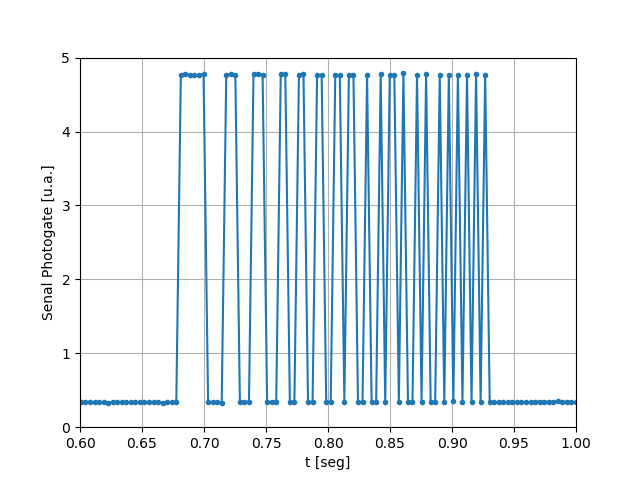

In [44]:
plt.plot(ts,ph,'.-')
plt.axis([0.6,1,0,5]);
plt.grid('on');
plt.xlabel('t [seg]');
plt.ylabel('Senal Photogate [u.a.]');

In [45]:
der = np.diff(ph)

<IPython.core.display.Javascript object>


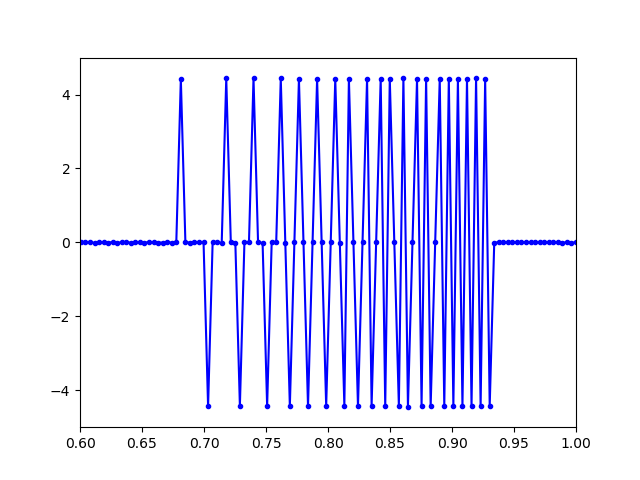

[0.6, 1, -5, 5]

In [46]:
plt.clf()
plt.plot(ts[1:],der,'b-');
plt.plot(ts[1:],der,'b.');

plt.axis([0.6,1,-5,5])

In [47]:
idx = np.where(der>2)
idx = np.array(idx)

In [48]:
idx

array([[185, 195, 201, 207, 211, 215, 219, 222, 226, 229, 231, 234, 237,
        239, 242, 244, 246, 248, 250, 252]])

In [52]:
ts[idx]

array([[ 0.677656,  0.714286,  0.736264,  0.758242,  0.772894,  0.787546,
         0.802198,  0.813187,  0.827839,  0.838828,  0.846154,  0.857143,
         0.868132,  0.875458,  0.886447,  0.893773,  0.901099,  0.908425,
         0.915751,  0.923077]])

In [53]:
np.diff(ts[idx])

array([[ 0.03663 ,  0.021978,  0.021978,  0.014652,  0.014652,  0.014652,
         0.010989,  0.014652,  0.010989,  0.007326,  0.010989,  0.010989,
         0.007326,  0.010989,  0.007326,  0.007326,  0.007326,  0.007326,
         0.007326]])